In [152]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['font.family'] = 'malgum'

In [153]:
df = pd.read_csv("월별 값 확인.csv", encoding='utf-8-sig')


In [216]:
TRAIN_SPLIT= 72
BATCH_SIZE = 64
BUFFER_SIZE = 10000
tf.random.set_seed(10)

In [155]:
features_considerd =['평균 풍속(m/s)','평균기압(hPa)','평균 기온(°C)','평균 수온(°C)']

features = df[features_considerd]
features.index = df['일시']
features


평균 풍속(m/s)    평균기압(hPa)  평균 기온(°C)  평균 수온(°C)
일시                                                       
2013-01-01    6.525847  1024.595339   3.572458  10.016949
2013-02-01    6.531905  1023.696190   4.250952   9.430476
2013-03-01    6.347393  1017.437441   8.159716  10.208531
2013-04-01    6.455801  1013.293370  10.238122  11.275138
2013-05-01    4.609052  1012.012069  14.780172  14.262069
...                ...          ...        ...        ...
2022-08-01    5.430936  1007.366621  26.528765  26.406106
2022-09-01    6.484129  1012.273960  23.048382  23.641757
2022-10-01    6.913013  1021.359689  18.018105  20.629562
2022-11-01    6.191293  1020.663810  15.432381  18.063537
2022-12-01    7.795640  1023.740191   6.588011  14.751771

[120 rows x 4 columns]

array([<AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>,
       <AxesSubplot:xlabel='일시'>, <AxesSubplot:xlabel='일시'>], dtype=object)

c:\Users\admin\anaconda33\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda33\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda33\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda33\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda33\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\a

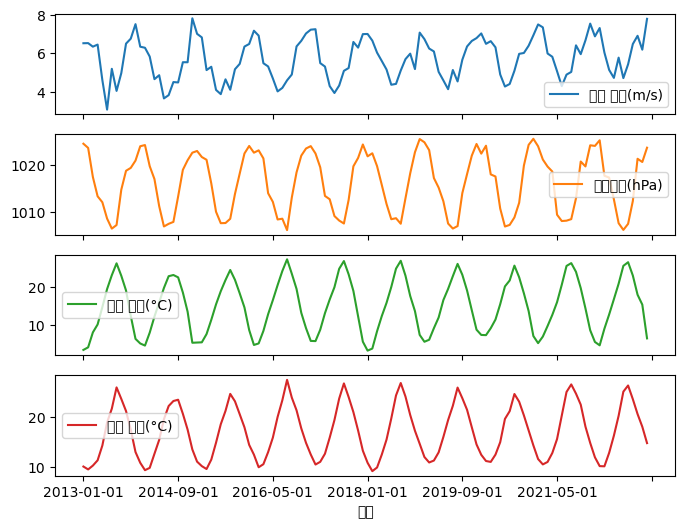

In [156]:
features.plot(subplots=True)

In [200]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

#표준화
dataset = (dataset-data_mean)/data_std


In [201]:
def create_time_steps(length):
    return list(range(-length,0))

In [159]:
# df_std = pd.DataFrame(dataset,columns=features_considerd,index=df['일시'])
# df_std.to_csv('정규화.csv',encoding='utf-8-sig')

In [160]:
len(dataset)

120

In [213]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []
  
  start_index = start_index + history_size # train(36) / valid(120)
  if end_index is None:
    end_index = len(dataset) # valid(120)
  
  
  for i in range(start_index, end_index): # train(36, 84) / valid(120, 120)
    indices = range(i-history_size, i, step) # train((0, 36) ~ (47, 83)) / 
    
    if indices == range((start_index+target_size-1), end_index-1):
      data.append(dataset[range((start_index+target_size-1), end_index)])
    else:
      data.append(dataset[indices])

    labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
def multivariate_val_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []
  
  start_index = start_index + history_size # train(36) / valid(120)
  if end_index is None:
    end_index = len(dataset) # valid(120)
  
  
    indices = range(start_index-history_size, start_index, step) # train((0, 36) ~ (47, 83)) / 
    data.append(dataset[indices])
    labels.append(target[start_index:end_index])

  return np.array(data), np.array(labels)

In [209]:
daga=[]


for i in range(0+36,84):
    k = range(i-36,i)
    daga.append(dataset[k])
print(daga)



[array([[ 0.87805836,  1.36609856, -1.58046135, -1.28992663],
       [ 0.88363536,  1.22188439, -1.4854419 , -1.3988834 ],
       [ 0.71375457,  0.21804594, -0.93804118, -1.25433399],
       [ 0.81356625, -0.44662007, -0.6469719 , -1.05617637],
       [-0.88674738, -0.65212747, -0.01088274, -0.50125508],
       [-2.30064335, -1.21536228,  0.65015954,  0.36511365],
       [-0.34722851, -1.56225522,  1.15903067,  0.88533025],
       [-1.40570987, -1.43812584,  1.59369883,  1.68281542],
       [-0.55300624, -0.21836815,  1.1375313 ,  1.25048311],
       [ 0.8593153 ,  0.43300109,  0.59803947,  0.79447092],
       [ 1.09738443,  0.53315415, -0.33268826,  0.09178275],
       [ 1.79208016,  0.78461381, -1.17594162, -0.74553331],
       [ 0.71202949,  1.27906297, -1.34410024, -1.14957636],
       [ 0.66162038,  1.32002472, -1.42142413, -1.42669642],
       [ 0.23972058,  0.59137318, -0.94760303, -1.33990302],
       [-0.84288846,  0.14686342, -0.3587524 , -0.81134108],
       [-0.65366542, -0

In [162]:
dataset[:,3]

array([-1.25649372, -1.36618124, -1.22066237, -1.02117574, -0.46253268,
        0.40964663,  0.93335224,  1.73618601,  1.30095412,  0.84188353,
        0.13448255, -0.70844925, -1.11520214, -1.3941808 , -1.30680529,
       -0.77469838, -0.24814265,  0.53140818,  1.03201676,  1.22135757,
        1.26998133,  0.73829523,  0.14060702, -0.61060585, -1.0717101 ,
       -1.2405897 , -1.35109269, -0.99440095, -0.35517174,  0.34249363,
        0.84727919,  1.49067377,  1.20968939,  0.72226656,  0.22847667,
       -0.43808577, -0.80632222, -1.28414666, -1.16802326, -0.71018115,
       -0.16206789,  0.61759962,  1.2503923 ,  2.02182791,  1.35006318,
        0.87057985,  0.18637481, -0.36096577, -0.80078814, -1.18043609,
       -1.07892918, -0.77239589, -0.16281805,  0.5010766 ,  1.31252375,
        1.88702935,  1.37053094,  0.8026274 ,  0.10426063, -0.65846207,
       -1.11447588, -1.43129295, -1.29292555, -0.80261618, -0.2366221 ,
        0.56096548,  1.43179053,  1.90213441,  1.38975247,  0.69

In [163]:
print(len(dataset))

120


In [214]:
past_history =36
future_target = 12
STEP=1

x_train, y_train = multivariate_data(dataset, dataset[:,3], 0, TRAIN_SPLIT,past_history, future_target, STEP)

x_valid, y_valid = multivariate_data(dataset, dataset[:,3], TRAIN_SPLIT, None, past_history,future_target, STEP)

C:\Users\admin\AppData\Local\Temp\ipykernel_4420\2991159388.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data), np.array(labels)


In [205]:
x_valid

array([], dtype=float64)

In [166]:
len(x_train)

12

In [215]:
x_train

array([array([[ 0.87805836,  1.36609856, -1.58046135, -1.28992663],
              [ 0.88363536,  1.22188439, -1.4854419 , -1.3988834 ],
              [ 0.71375457,  0.21804594, -0.93804118, -1.25433399],
              [ 0.81356625, -0.44662007, -0.6469719 , -1.05617637],
              [-0.88674738, -0.65212747, -0.01088274, -0.50125508],
              [-2.30064335, -1.21536228,  0.65015954,  0.36511365],
              [-0.34722851, -1.56225522,  1.15903067,  0.88533025],
              [-1.40570987, -1.43812584,  1.59369883,  1.68281542],
              [-0.55300624, -0.21836815,  1.1375313 ,  1.25048311],
              [ 0.8593153 ,  0.43300109,  0.59803947,  0.79447092],
              [ 1.09738443,  0.53315415, -0.33268826,  0.09178275],
              [ 1.79208016,  0.78461381, -1.17594162, -0.74553331],
              [ 0.71202949,  1.27906297, -1.34410024, -1.14957636],
              [ 0.66162038,  1.32002472, -1.42142413, -1.42669642],
              [ 0.23972058,  0.59137318, -0.9476

In [168]:
y_train


array([[-0.80632222, -1.28414666, -1.16802326, -0.71018115, -0.16206789,
         0.61759962,  1.2503923 ,  2.02182791,  1.35006318,  0.87057985,
         0.18637481, -0.36096577],
       [-1.28414666, -1.16802326, -0.71018115, -0.16206789,  0.61759962,
         1.2503923 ,  2.02182791,  1.35006318,  0.87057985,  0.18637481,
        -0.36096577, -0.80078814],
       [-1.16802326, -0.71018115, -0.16206789,  0.61759962,  1.2503923 ,
         2.02182791,  1.35006318,  0.87057985,  0.18637481, -0.36096577,
        -0.80078814, -1.18043609],
       [-0.71018115, -0.16206789,  0.61759962,  1.2503923 ,  2.02182791,
         1.35006318,  0.87057985,  0.18637481, -0.36096577, -0.80078814,
        -1.18043609, -1.07892918],
       [-0.16206789,  0.61759962,  1.2503923 ,  2.02182791,  1.35006318,
         0.87057985,  0.18637481, -0.36096577, -0.80078814, -1.18043609,
        -1.07892918, -0.77239589],
       [ 0.61759962,  1.2503923 ,  2.02182791,  1.35006318,  0.87057985,
         0.18637481, -

In [169]:
print('Single window of past history : {}'.format(x_train[0].shape))
print('Target temp to predict : {}'.format(y_train[0].shape))

Single window of past history : (36, 4)
Target temp to predict : (12,)


In [170]:
print(x_valid)

[[[ 1.50308271  1.30029078 -1.23756958 -0.80078814]
  [ 1.52411236  1.04578841 -1.24437141 -1.18043609]
  [-0.0028952   0.56783114 -0.82284541 -1.07892918]
  ...
  [ 0.74677479  0.33013105  0.63241641  0.8893495 ]
  [ 0.99501151  0.97030315 -0.09981594  0.2296311 ]
  [ 1.12381313  1.37477876 -0.82125637 -0.42060206]]

 [[ 1.52411236  1.04578841 -1.24437141 -1.18043609]
  [-0.0028952   0.56783114 -0.82284541 -1.07892918]
  [-0.15702457 -0.4248148  -0.20871052 -0.77239589]
  ...
  [ 0.99501151  0.97030315 -0.09981594  0.2296311 ]
  [ 1.12381313  1.37477876 -0.82125637 -0.42060206]
  [ 1.3339426   1.04045291 -1.01602945 -0.81353528]]

 [[-0.0028952   0.56783114 -0.82284541 -1.07892918]
  [-0.15702457 -0.4248148  -0.20871052 -0.77239589]
  [-1.03691915 -0.53904521  0.29793397 -0.16281805]
  ...
  [ 1.12381313  1.37477876 -0.82125637 -0.42060206]
  [ 1.3339426   1.04045291 -1.01602945 -0.81353528]
  [ 0.86577597  1.31442934 -1.02320488 -1.04757013]]

 ...

 [[ 0.42425601  0.35890721  0.4282

In [171]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

valid_data = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
valid_data = valid_data.batch(BATCH_SIZE).repeat()

In [172]:
for x,y in train_data.take(1):
    print(len(y[0]))

12


In [173]:
def mplot(history, true_future, prediction):
    plt.figure(figsize=(12,6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:,3]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future),'bo', label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction),'ro', label='Predicted Future')
    plt.legend(loc='upper right')
    plt.show()

In [174]:
for x,y in train_data.take(1):
    print(x[0].shape)
    print(y[0].shape)
    print(np.array([0]))


(36, 4)
(12,)
[0]


In [175]:
train_data.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 36, 4), dtype=tf.float64, name=None), TensorSpec(shape=(None, 12), dtype=tf.float64, name=None))>

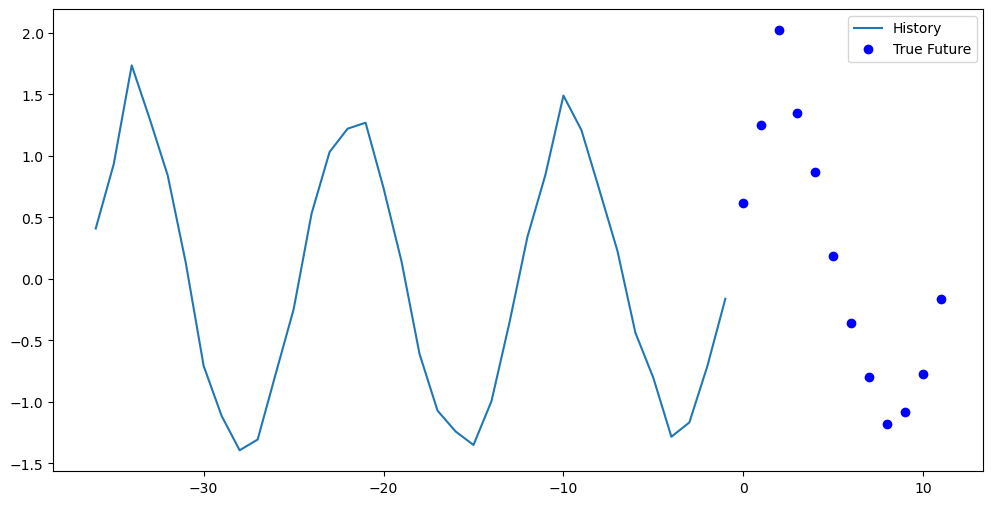

In [176]:
for x,y in train_data.take(1):
    mplot(x[0], y[0], np.array([0]))

In [194]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(36,
                                          return_sequences=True,
                                          input_shape=x_train.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(12))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [195]:
for x, y in valid_data.take(1):
  print (multi_step_model.predict(x).shape)

1/1 [==============================] - 1s 594ms/step
(24, 12)


In [196]:
EVALUATION_INTERVAL = 200
EPOCHS = 50

In [197]:
for x,y in valid_data.take(1):
    print(y[0])

tf.Tensor(
[-0.81353528 -1.04757013 -1.08157533 -0.80569019 -0.33542812  0.54468175
  0.83742756  1.4863547   1.19532935  0.67825283  0.11078581 -0.45652585], shape=(12,), dtype=float64)


In [198]:
multi_step_history = multi_step_model.fit(train_data, epochs=EPOCHS, steps_per_epoch=EVALUATION_INTERVAL,validation_data=valid_data,validation_steps=30)

Epoch 1/50
200/200 [==============================] - 7s 18ms/step - loss: 0.3761 - val_loss: 0.2406
Epoch 2/50
200/200 [==============================] - 3s 16ms/step - loss: 0.1091 - val_loss: 0.1730
Epoch 3/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0887 - val_loss: 0.1760
Epoch 4/50
200/200 [==============================] - 3s 16ms/step - loss: 0.0795 - val_loss: 0.1828
Epoch 5/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0737 - val_loss: 0.1863
Epoch 6/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0694 - val_loss: 0.1921
Epoch 7/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0656 - val_loss: 0.1922
Epoch 8/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0623 - val_loss: 0.1711
Epoch 9/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0593 - val_loss: 0.1939
Epoch 10/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0567 - val_lo

In [192]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

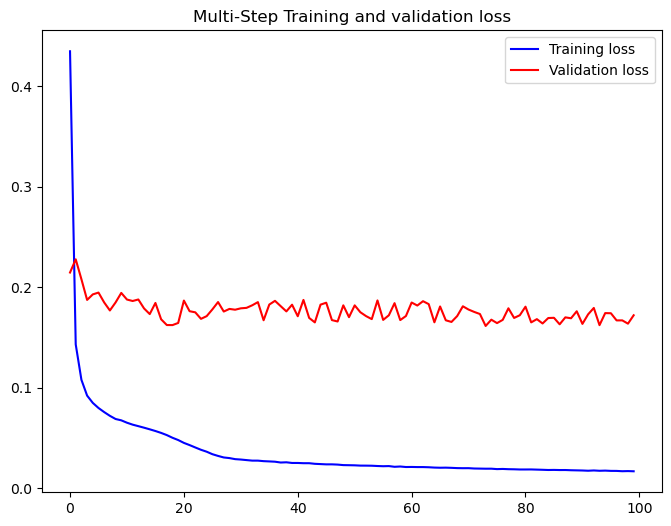

In [193]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

1/1 [==============================] - 0s 28ms/step


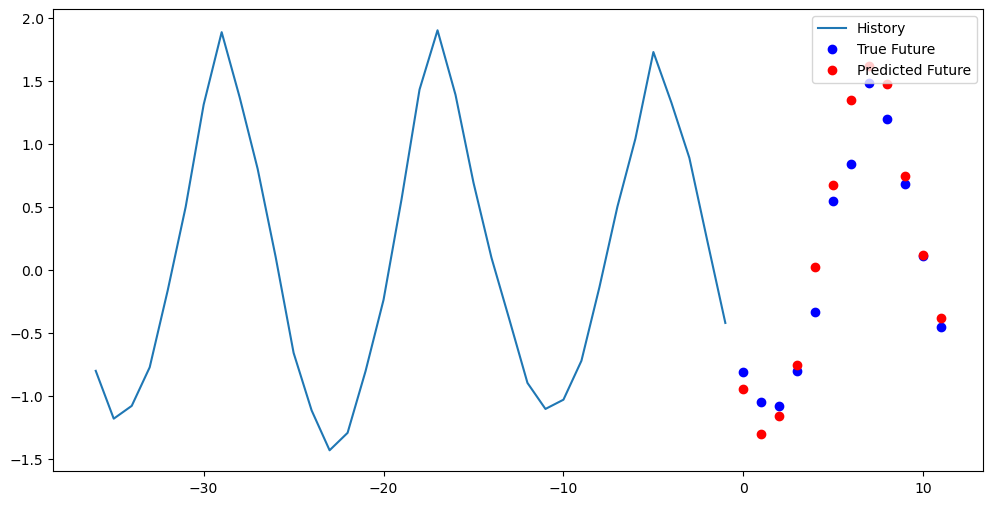

1/1 [==============================] - 0s 30ms/step


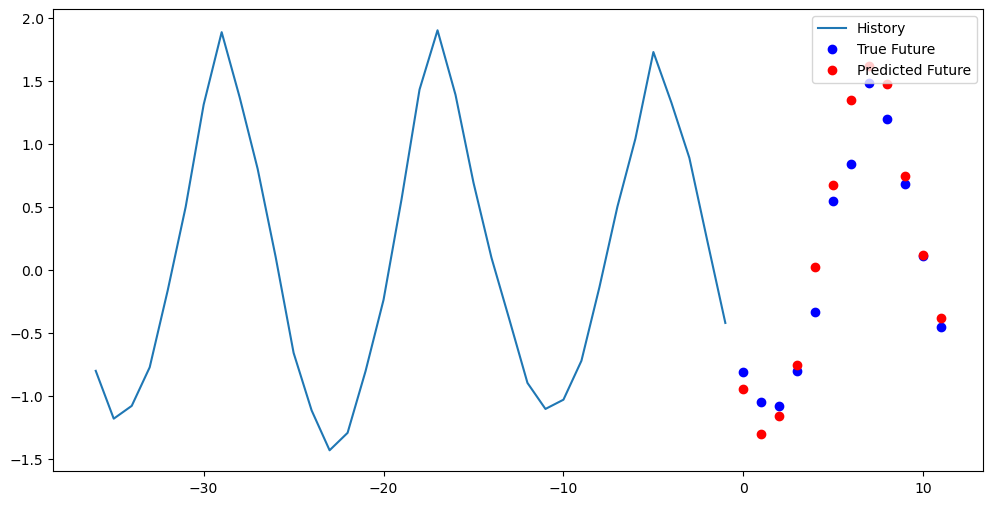

1/1 [==============================] - 0s 25ms/step


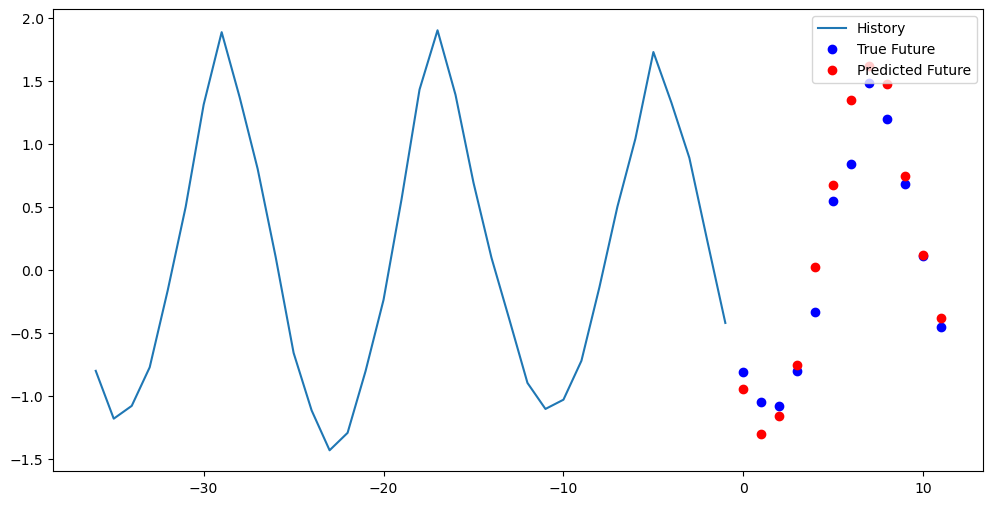

In [184]:
for x, y in valid_data.take(3):
  mplot(x[0], y[0], multi_step_model.predict(x)[0])